<a href="https://colab.research.google.com/github/Vimalkumar-Narasimman/AI/blob/main/project_cnn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this kernel, I will try building a CNN from scratch for multi-class classification for the fruits dataset. In this dataset, we have a total of 55244 images which are divided into two folders - training set of 41322 images and testing set of 13877 images. The size of the given images is 100 * 100. We have 81 classes of fruits.
Let's get started!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
# Obtain from https://www.kaggle.com/username/account
os.environ["KAGGLE_USERNAME"]="vimalkumarnarasiman"
os.environ["KAGGLE_KEY"]="ae953160d689d513a28da33f651bf46d"

import kaggle
!kaggle datasets download moltean/fruits


100% 1.28G/1.28G [00:06<00:00, 205MB/s]
100% 1.28G/1.28G [00:06<00:00, 201MB/s]


In [3]:
import zipfile
with zipfile.ZipFile('fruits.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Data/')

In [4]:
# First, we are going to load the file names and their respective target labels into numpy array!
from sklearn.datasets import load_files
import numpy as np

train_dir = '/content/drive/MyDrive/Data/fruits-360_dataset/fruits-360/Training'
test_dir = '/content/drive/MyDrive/Data/fruits-360_dataset/fruits-360/Test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)
print('Loading complete!')

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])



Loading complete!
Training set size :  67692
Testing set size :  22688


In [17]:
from glob import glob
#Finding number of classes
className = glob(train_dir + '/*')
number_of_class = len(className)
print(number_of_class)

131


In [5]:
# Let's confirm the number of classes :p
no_of_classes = len(np.unique(y_train))
no_of_classes

131

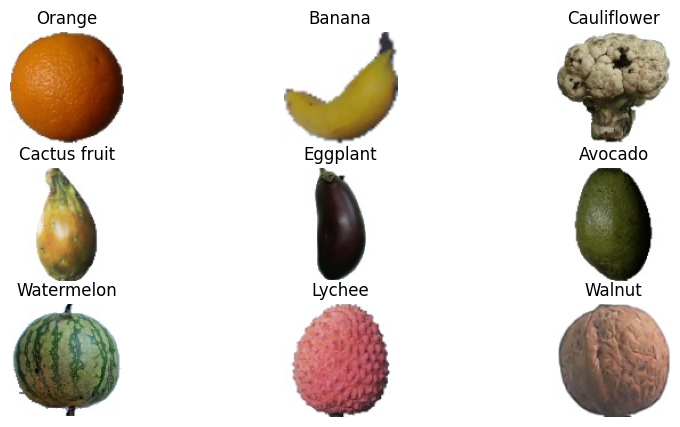

In [13]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
#Visualizing  Images
images = ['Orange', 'Banana', 'Cauliflower', 'Cactus fruit', 'Eggplant', 'Avocado', 'Watermelon','Lychee', 'Walnut']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_dir + '/' + images[i] +"/0_100.jpg", target_size=(100,100)))

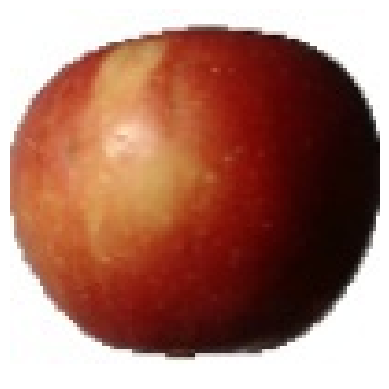

(100, 100, 3)


In [21]:
#Displaying the image
img = load_img(train_dir + "/Apple Braeburn/0_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Printing the shape of the image array
x = img_to_array(img)
print(x.shape)

In [15]:
import os
from collections import Counter
#Storing occurences of fruits in a list
fruits = []
fruits_image = []
for i in os.listdir(train_dir ):
    for image_filename in os.listdir(train_dir + '/' + i):
        fruits.append(i)
        fruits_image.append(i + '/' + image_filename)
#Finding top 10 frequent Fruits
newData = Counter(fruits)
frequent_fruits = newData.most_common(10)
print("Top 10 frequent Fruits:")
frequent_fruits

Top 10 frequent Fruits:


[('Grape Blue', 984),
 ('Plum 3', 900),
 ('Cherry 2', 738),
 ('Cherry Rainier', 738),
 ('Melon Piel de Sapo', 738),
 ('Peach 2', 738),
 ('Strawberry Wedge', 738),
 ('Tomato 1', 738),
 ('Tomato 3', 738),
 ('Walnut', 735)]

In [6]:
print(y_train[0:10])
# target labels are numbers corresponding to class label. We need to change them to a vector of 81 elements.

[ 27  73  68 114 117  80  72   2  90 130]


In [19]:
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

In [22]:
#Creating the model
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))
model.add(Activation("softmax"))

#Compiling the model
model.compile(loss = "categorical_crossentropy",
optimizer = "rmsprop",
metrics = ["accuracy"])

#Getting model's summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                 

In [23]:
#Specifing epochs & batch size
epochs = 100
batch_size = 64

In [25]:
#Creating an object of ImageDataGenerator.
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)
#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
directory = train_dir,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")
test_generator = test_datagen.flow_from_directory(
directory = test_dir,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [26]:
#Fitting the model
hist = model.fit_generator(
generator = train_generator,
steps_per_epoch = 1600 // batch_size,
epochs=epochs,
validation_data = test_generator,
validation_steps = 800 // batch_size)

<ipython-input-26-54a208a15b62>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/100
25/25 [==============================] - 22s 612ms/step - loss: 4.8591 - accuracy: 0.0150 - val_loss: 4.6832 - val_accuracy: 0.0339
Epoch 2/100
25/25 [==============================] - 20s 809ms/step - loss: 4.4861 - accuracy: 0.0481 - val_loss: 4.1282 - val_accuracy: 0.0794
Epoch 3/100
25/25 [==============================] - 16s 625ms/step - loss: 3.9983 - accuracy: 0.0881 - val_loss: 3.5434 - val_accuracy: 0.1458
Epoch 4/100
25/25 [==============================] - 15s 583ms/step - loss: 3.5408 - accuracy: 0.1394 - val_loss: 2.8747 - val_accuracy: 0.2539
Epoch 5/100
25/25 [==============================] - 17s 675ms/step - loss: 3.1518 - accuracy: 0.1781 - val_loss: 2.5082 - val_accuracy: 0.3281
Epoch 6/100
25/25 [==============================] - 17s 688ms/step - loss: 2.7987 - accuracy: 0.2512 - val_loss: 2.1515 - val_accuracy: 0.4401
Epoch 7/100
25/25 [==============================] - 16s 628ms/step - loss: 2.4081 - accuracy: 0.3256 - val_loss: 1.6340 - val_accuracy:

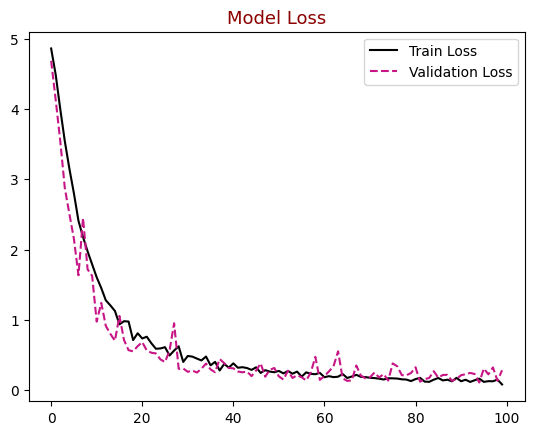

In [27]:
#Plotting train & validation loss
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

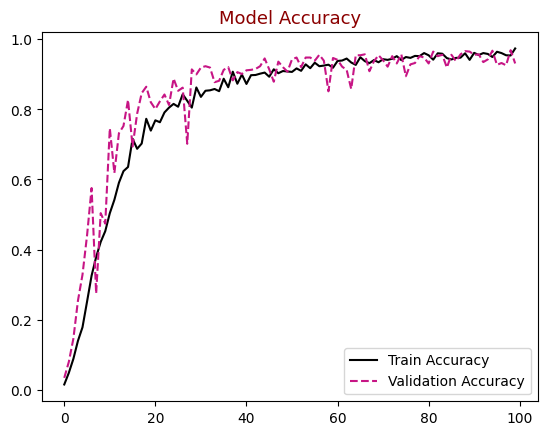

In [28]:
#Plotting train & validation accuracy
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

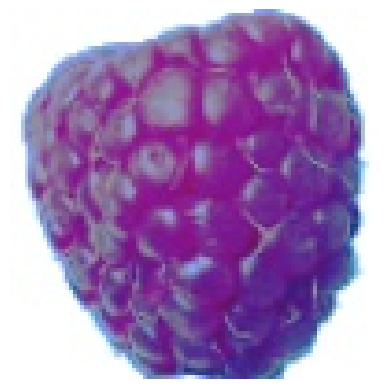

In [29]:
#Displaying the selected image
img = load_img(test_dir + "/Raspberry/77_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Loading the image
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image
image = load(test_dir+'/Raspberry/77_100.jpg')

In [30]:
#Predicting the class
prediction = (np.argmax(model.predict(image), axis=-1))
print(prediction)

1/1 [==============================] - 0s 310ms/step
[113]


In [31]:
#Printing class dictionary
print(test_generator.class_indices)

{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape White 4': 49, 'Grapefruit Pink': 50, 'Grapefrui